El usu

In [3]:
# Importa la biblioteca pandas con el alias pd, que se usa para manipulación de datos en estructuras tipo DataFrame.
import pandas as pd

# Importa la biblioteca numpy con el alias np, que se usa para operaciones numéricas avanzadas (aunque en este fragmento no se utiliza).
import numpy as np

# Lee el archivo 'grd_2023.csv' usando como delimitador el símbolo '|' y lo guarda en un DataFrame llamado grd.
grd = pd.read_csv('grd_2023.csv', delimiter='|')

# Muestra las primeras 5 filas del DataFrame grd para una vista preliminar de los datos.
grd.head()

# Lee el archivo 'hospitales.csv', sin encabezado (header=None), y con '|' como delimitador. Guarda el resultado en un DataFrame llamado hospitales.
hospitales = pd.read_csv('hospitales.csv', header=None, delimiter="|")

# Muestra las primeras 5 filas del DataFrame hospitales.
hospitales.head()

# Lee el archivo 'ir-GRD.csv', sin encabezado (header=None), usando '|' como delimitador, y lo guarda en el DataFrame ir.
ir = pd.read_csv('ir-GRD.csv', delimiter='|', header = None)

# Muestra el contenido completo del DataFrame ir.
ir


,0,1
0,11011,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES
1,11012,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W/CC
2,11013,PH PROCEDIMIENTOS VASCULARES INTRACRANEALES W...
3,11101,PH CRANEOTOMÍA
4,11102,PH CRANEOTOMÍA W/CC
...,...,...
1061,990089,"INAGRUPABLE, DURACIÓN DE LA ESTANCIA NO VÁLIDA"
1062,990099,"INAGRUPABLE, PACIENTE AMBULATORIO CON PROCED...."
1063,990119,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."
1064,990129,"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA ..."


In [4]:
# Realiza una combinación (merge) entre los DataFrames grd y hospitales. 
# Se usa 'COD_HOSPITAL' de grd y la columna 0 de hospitales para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, lo que significa que todos los registros de grd estarán en el resultado.
grd_h = pd.merge(grd, hospitales, left_on='COD_HOSPITAL', right_on=0, how='left')

# Elimina la columna 0 del DataFrame resultante, que es la que se utilizó para la combinación y que ya no es necesaria.
grd_h = grd_h.drop(columns=0)

# Renombra la columna 1 del DataFrame resultante a 'NOMBRE_HOSPITAL' para que tenga un nombre más descriptivo.
grd_h = grd_h.rename(columns={1: 'NOMBRE_HOSPITAL'})

# Renombra la columna 'FECHAALTA' a 'FECHA_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"FECHAALTA": 'FECHA_ALTA'})

# Renombra la columna 'TIPOALTA' a 'TIPO_ALTA' para estandarizar el nombre de la columna.
grd_h = grd_h.rename(columns={"TIPOALTA": 'TIPO_ALTA'})

# Muestra las primeras 5 filas del DataFrame grd_h para revisar el resultado de las transformaciones.
grd_h.head()


,COD_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,NOMBRE_HOSPITAL
0,122100,72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,64161.0,0.7094,1.0,1.0,43.0,2,Hospital Clínico Regional (Valdivia)
1,114101,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,41301.0,1.0869,1.0,1.0,22.0,6,Complejo Hospitalario Dr. Sótero del Río (San...
2,114101,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,44161.0,0.4084,1.0,1.0,3.0,1,Complejo Hospitalario Dr. Sótero del Río (San...
3,106103,67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,131301.0,0.6406,1.0,1.0,45.0,1,Hospital Claudio Vicuña (San Antonio)
4,106103,100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,74131.0,0.5346,1.0,1.0,0.0,2,Hospital Claudio Vicuña (San Antonio)


In [5]:
# Realiza una combinación (merge) entre los DataFrames grd_h y ir. 
# Se utiliza 'IR_29301_COD_GRD' de grd_h y la columna 0 de ir para hacer la combinación (join).
# Se utiliza 'how="left"' para hacer una combinación a la izquierda, asegurando que todos los registros de grd_h estén en el resultado.
# Después, se elimina la columna 0 de ir (que se utilizó para la combinación) y se renombra la columna 1 de ir a 'NOMBRE_IR'.
grd_f = pd.merge(grd_h, ir, left_on='IR_29301_COD_GRD', right_on=0, how='left').drop(columns=0).rename(columns={1: 'NOMBRE_IR'})

# Selecciona un subconjunto de columnas del DataFrame grd_f, asegurando que solo se mantendrán las columnas especificadas en la lista.
# Esto reordena las columnas y se asegura de que solo estén las necesarias para el análisis.
grd_f = grd_f[["COD_HOSPITAL", "NOMBRE_HOSPITAL", "CIP_ENCRIPTADO", "SEXO", "FECHA_NACIMIENTO",
               "SERVICIO_SALUD", "TIPO_INGRESO", "FECHA_INGRESO", "FECHA_ALTA", "TIPO_ALTA",
               "DIAGNOSTICO1", "NOMBRE_IR", "IR_29301_COD_GRD", "IR_29301_PESO", "IR_29301_SEVERIDAD",
               "IR_29301_MORTALIDAD", "EDAD","DIAS_ESTANCIA"]]

# Muestra el DataFrame resultante grd_f, que ahora contiene solo las columnas seleccionadas.
grd_f


,COD_HOSPITAL,NOMBRE_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,NOMBRE_IR,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA
0,122100,Hospital Clínico Regional (Valdivia),72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,MH INFECCIONES GASTROINTESTINALES MAYORES,64161.0,0.7094,1.0,1.0,43.0,2
1,114101,Complejo Hospitalario Dr. Sótero del Río (San...,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,41301.0,1.0869,1.0,1.0,22.0,6
2,114101,Complejo Hospitalario Dr. Sótero del Río (San...,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,MH NEUMONÍA SIMPLE Y TOS FERINA,44161.0,0.4084,1.0,1.0,3.0,1
3,106103,Hospital Claudio Vicuña (San Antonio),67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,131301.0,0.6406,1.0,1.0,45.0,1
4,106103,Hospital Claudio Vicuña (San Antonio),100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,"MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",74131.0,0.5346,1.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039582,105102,Hospital Dr. Antonio Tirado Lanas (Ovalle),78111817.0,MUJER,1995-12-06,COQUIMBO,OBSTETRICA,2023-01-01,2023-01-04,DOMICILIO,O03.1,"PH PROCEDIMIENTOS SOBRE ÚTERO Y CUELLO, DILAT...",131111.0,0.5227,1.0,1.0,27.0,3
1039583,118100,Hospital Clínico Regional Dr. Guillermo Grant...,76593606.0,MUJER,1991-04-26,CONCEPCIÓN,PROGRAMADA,2023-06-14,2023-06-14,DOMICILIO,N87.1,PA OTROS PROCEDIMIENTOS GINECOLÓGICOS,132340.0,0.1761,0.0,0.0,32.0,0
1039584,115100,Hospital Regional de Rancagua,100360940.0,HOMBRE,2015-01-08,LIBERTADOR B. O HIGGINS,URGENCIA,2023-11-29,2023-12-01,DOMICILIO,K35.8,PH PROCEDIMIENTOS SOBRE APÉNDICE,61131.0,0.7398,1.0,1.0,9.0,2
1039585,123100,Hospital Base San José de Osorno,78557002.0,HOMBRE,2014-01-07,OSORNO,PROGRAMADA,2023-03-28,2023-03-28,DOMICILIO,J45.0,MH BRONQUIOLITIS Y ASMA,44181.0,0.3452,1.0,1.0,9.0,0


In [6]:
# Devuelve los valores únicos presentes en la columna 'IR_29301_MORTALIDAD' del DataFrame grd_f.
# Esto permite verificar qué valores distintos existen en esa columna, lo cual es útil para entender los datos categóricos o los resultados en esa columna.
grd_f["IR_29301_MORTALIDAD"].unique()


array([ 1.,  0.,  2.,  3., nan])

Descripción de la mortalidad:

In [7]:
# Calcula la media (promedio) de los valores en la columna 'IR_29301_MORTALIDAD' del DataFrame grd_f.
# Esto devuelve el valor promedio de la mortalidad según los datos de esa columna.
grd_f["IR_29301_MORTALIDAD"].mean()

# Calcula la mediana de los valores en la columna 'IR_29301_MORTALIDAD' del DataFrame grd_f.
# La mediana es el valor central que divide la mitad superior e inferior de los datos ordenados.
grd_f["IR_29301_MORTALIDAD"].median()

# Encuentra el valor máximo en la columna 'IR_29301_MORTALIDAD' del DataFrame grd_f.
# Esto devuelve el valor más alto registrado en esa columna.
grd_f["IR_29301_MORTALIDAD"].max()

# Encuentra el valor mínimo en la columna 'IR_29301_MORTALIDAD' del DataFrame grd_f.
# Esto devuelve el valor más bajo registrado en esa columna.
grd_f["IR_29301_MORTALIDAD"].min()

# Obtiene un resumen estadístico de la columna 'IR_29301_MORTALIDAD', que incluye varias estadísticas como media, desviación estándar, valores mínimo, máximo, etc.
# Luego, aplica un formato de dos decimales a cada uno de esos valores para presentarlos con mayor claridad.
grd_f["IR_29301_MORTALIDAD"].describe().apply(lambda x: '{:.2f}'.format(x))


count    1039557.00
mean           1.30
std            0.95
min            0.00
25%            1.00
50%            1.00
75%            2.00
max            3.00
Name: IR_29301_MORTALIDAD, dtype: object

In [8]:
# Cuenta cuántos valores NaN (Not a Number) hay en la columna 'IR_29301_MORTALIDAD' del DataFrame grd_f.
# La función isna() devuelve un booleano (True o False) para cada valor en la columna, indicando si es NaN, y sum() cuenta cuántos True hay.
grd_f['IR_29301_MORTALIDAD'].isna().sum()

# Filtra el DataFrame grd_f para obtener solo las filas donde la columna 'IR_29301_MORTALIDAD' tiene valores NaN.
# Guarda el resultado en el DataFrame mortalidadNa, que contendrá todas las filas con valores faltantes en esa columna.
mortalidadNa = grd_f[grd_f['IR_29301_MORTALIDAD'].isna()]

# Muestra el DataFrame mortalidadNa, que contiene todas las filas con valores NaN en la columna 'IR_29301_MORTALIDAD'.
mortalidadNa


,COD_HOSPITAL,NOMBRE_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,NOMBRE_IR,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA
32677,114105,Hospital Clínico Metropolitano La Florida Dra...,74189482.0,MUJER,1995-03-09,METROPOLITANO SURORIENTE,URGENCIA,2023-05-24,2023-05-29,ALTA VOLUNTARIA,T42.4,NaN,NaN,NaN,NaN,NaN,28.0,5
211908,114105,Hospital Clínico Metropolitano La Florida Dra...,72640269.0,HOMBRE,1956-05-07,METROPOLITANO SURORIENTE,URGENCIA,2023-01-21,2023-03-08,FALLECIDO,K66.1,NaN,NaN,NaN,NaN,NaN,67.0,46
245162,114105,Hospital Clínico Metropolitano La Florida Dra...,81462281.0,HOMBRE,1978-04-12,METROPOLITANO SURORIENTE,URGENCIA,2023-10-21,2023-10-23,DOMICILIO,T51.9,NaN,NaN,NaN,NaN,NaN,46.0,2
257734,114105,Hospital Clínico Metropolitano La Florida Dra...,78149802.0,HOMBRE,1959-01-22,METROPOLITANO SURORIENTE,URGENCIA,2022-12-14,2023-01-25,FALLECIDO,K56.2,NaN,NaN,NaN,NaN,NaN,64.0,42
271713,114105,Hospital Clínico Metropolitano La Florida Dra...,77084522.0,HOMBRE,1984-09-04,METROPOLITANO SURORIENTE,URGENCIA,2023-09-01,2023-09-20,DERIVACIÓN OTRO HOSPITAL DE LA RED NACIONAL,K72.9,NaN,NaN,NaN,NaN,NaN,39.0,19
273576,114105,Hospital Clínico Metropolitano La Florida Dra...,74334525.0,MUJER,1990-09-21,METROPOLITANO SURORIENTE,URGENCIA,2023-01-30,2023-03-07,DOMICILIO,T43.2,NaN,NaN,NaN,NaN,NaN,32.0,36
290394,114105,Hospital Clínico Metropolitano La Florida Dra...,74992858.0,MUJER,1956-01-05,METROPOLITANO SURORIENTE,URGENCIA,2023-04-17,2023-05-03,FALLECIDO,I66.0,NaN,NaN,NaN,NaN,NaN,67.0,16
372315,114105,Hospital Clínico Metropolitano La Florida Dra...,69770494.0,MUJER,1969-11-14,METROPOLITANO SURORIENTE,URGENCIA,2023-04-22,2023-05-31,DERIVACIÓN OTRO HOSPITAL DE LA RED NACIONAL,J10.0,NaN,NaN,NaN,NaN,NaN,53.0,39
372512,114105,Hospital Clínico Metropolitano La Florida Dra...,95923094.0,MUJER,1995-11-09,METROPOLITANO SURORIENTE,URGENCIA,2023-10-30,2023-11-25,HOSPITALIZACIÓN DOMICILIARIA,G70.0,NaN,NaN,NaN,NaN,NaN,28.0,26
391375,114105,Hospital Clínico Metropolitano La Florida Dra...,69726942.0,HOMBRE,1957-06-11,METROPOLITANO SURORIENTE,URGENCIA,2023-06-04,2023-06-30,HOSPITALIZACIÓN DOMICILIARIA,I21.4,NaN,NaN,NaN,NaN,NaN,66.0,26


Calculamos el promedio de mortalidad de cada IR, para sustituir los NaN

In [9]:
# Crea un nuevo DataFrame mortxenf que contiene solo las columnas 'NOMBRE_IR' e 'IR_29301_MORTALIDAD' del DataFrame grd_f.
mortxenf = grd_f[["NOMBRE_IR","IR_29301_MORTALIDAD"]]

# Elimina las filas de mortxenf donde el valor en la columna 'IR_29301_MORTALIDAD' es NaN (valor faltante).
# Esto asegura que solo se mantengan las filas con valores válidos en la columna de mortalidad.
mortxenf = mortxenf.dropna(subset=['IR_29301_MORTALIDAD'])

# Agrupa los datos de mortxenf por la columna 'NOMBRE_IR', calculando la media de la columna 'IR_29301_MORTALIDAD' para cada grupo.
# Esto proporciona el valor promedio de la mortalidad para cada nombre de IR (Institución o categoría relacionada).
mortxenf.groupby("NOMBRE_IR").mean()


,IR_29301_MORTALIDAD
NOMBRE_IR,
"INAGRUPABLE, CÓDIGO DIAGNÓSTICO PRINCIPAL ERRÓNEO",0.000000
"INAGRUPABLE, DIAG. PRINCIPAL INVÁLIDO COMO DIAG. DE ALTA PARA CDM 15 NEONATOS",0.000000
"INAGRUPABLE, PACIENTE AMBULATORIO CON PROCED. DE HOSPITALIZACIÓN",0.000000
"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA HOMBRE",0.000000
"INAGRUPABLE, SIN CRITERIO DE AGRUPACIÓN PARA MUJER",0.000000
...,...
PH TRASPLANTE HEPÁTICO W/CC,2.444444
PH TRASPLANTE HEPÁTICO W/MCC,2.964706
PH VENTILACIÓN MECÁNICA PROLONGADA SIN TRAQUEOSTOMÍA,1.108280


In [10]:
#Rellenamos los datos de mortalidad con el promedio de mortalidad del diagnóstico
grd_f["IR_29301_MORTALIDAD"] = grd_f["IR_29301_MORTALIDAD"].fillna(grd_f["NOMBRE_IR"].map(mortxenf["IR_29301_MORTALIDAD"]))

Si siguen siendo NaN, los botamos

In [11]:
# Elimina las filas de grd_f donde el valor en la columna 'IR_29301_MORTALIDAD' es NaN (valor faltante).
# Esto asegura que solo se mantendrán las filas con valores válidos en la columna de mortalidad.
grd_f = grd_f.dropna(subset=['IR_29301_MORTALIDAD'])

# Convierte los valores en la columna 'IR_29301_MORTALIDAD' a enteros (tipo int) y los guarda como un array de valores.
# Luego, se extraen esos valores y se convierten en un arreglo numpy.
mortalidad = grd_f["IR_29301_MORTALIDAD"].astype(int).values

# Usa np.bincount() para contar las ocurrencias de cada valor en el arreglo 'mortalidad'.
# Esta función devuelve un arreglo donde el índice representa el valor y el valor en ese índice representa cuántas veces aparece ese valor.
np.bincount(mortalidad)


array([193550, 510177, 166014, 169816], dtype=int64)

Creamos una columna binaria "Fallecidos"

In [12]:
#Vemos quienes murieron y creamos una columna boinaria "Fallecido"
falle = grd_f["TIPO_ALTA"] == "FALLECIDO"
grd_f["FALLECIDO"] = falle.astype(int)
grd_f.head(5)

C:\Users\joaco\AppData\Local\Temp\ipykernel_6476\357703477.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grd_f["FALLECIDO"] = falle.astype(int)


,COD_HOSPITAL,NOMBRE_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,NOMBRE_IR,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,FALLECIDO
0,122100,Hospital Clínico Regional (Valdivia),72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,MH INFECCIONES GASTROINTESTINALES MAYORES,64161.0,0.7094,1.0,1.0,43.0,2,0
1,114101,Complejo Hospitalario Dr. Sótero del Río (San...,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,41301.0,1.0869,1.0,1.0,22.0,6,0
2,114101,Complejo Hospitalario Dr. Sótero del Río (San...,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,MH NEUMONÍA SIMPLE Y TOS FERINA,44161.0,0.4084,1.0,1.0,3.0,1,0
3,106103,Hospital Claudio Vicuña (San Antonio),67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,131301.0,0.6406,1.0,1.0,45.0,1,0
4,106103,Hospital Claudio Vicuña (San Antonio),100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,"MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",74131.0,0.5346,1.0,1.0,0.0,2,0


In [13]:
grd_f.head(20)

,COD_HOSPITAL,NOMBRE_HOSPITAL,CIP_ENCRIPTADO,SEXO,FECHA_NACIMIENTO,SERVICIO_SALUD,TIPO_INGRESO,FECHA_INGRESO,FECHA_ALTA,TIPO_ALTA,DIAGNOSTICO1,NOMBRE_IR,IR_29301_COD_GRD,IR_29301_PESO,IR_29301_SEVERIDAD,IR_29301_MORTALIDAD,EDAD,DIAS_ESTANCIA,FALLECIDO
0,122100,Hospital Clínico Regional (Valdivia),72196813.0,HOMBRE,1980-04-13,VALDIVIA,URGENCIA,2023-03-12,2023-03-14,DOMICILIO,K35.3,MH INFECCIONES GASTROINTESTINALES MAYORES,64161.0,0.7094,1.0,1.0,43.0,2,0
1,114101,Complejo Hospitalario Dr. Sótero del Río (San...,NaN,HOMBRE,2001-11-04,METROPOLITANO SURORIENTE,URGENCIA,2023-11-04,2023-11-10,DOMICILIO,J93.1,PH PROCEDIMIENTOS MODERADAMENTE COMPLEJOS SOB...,41301.0,1.0869,1.0,1.0,22.0,6,0
2,114101,Complejo Hospitalario Dr. Sótero del Río (San...,97627974.0,HOMBRE,2020-07-30,METROPOLITANO SURORIENTE,URGENCIA,2023-06-07,2023-06-08,HOSPITALIZACIÓN DOMICILIARIA,J12.1,MH NEUMONÍA SIMPLE Y TOS FERINA,44161.0,0.4084,1.0,1.0,3.0,1,0
3,106103,Hospital Claudio Vicuña (San Antonio),67770674.0,MUJER,1978-11-14,VALPARAISO SAN ANTONIO,PROGRAMADA,2023-05-25,2023-05-26,DOMICILIO,N39.3,PH HISTERECTOMIA VAGINAL Y OTROS PROCEDIMIENT...,131301.0,0.6406,1.0,1.0,45.0,1,0
4,106103,Hospital Claudio Vicuña (San Antonio),100390800.0,MUJER,2023-12-20,VALPARAISO SAN ANTONIO,URGENCIA,2023-12-28,2023-12-30,DOMICILIO,R17,"MH ENFERMEDADES HEPÁTICAS EXCEPTO NEOPLASIAS,...",74131.0,0.5346,1.0,1.0,0.0,2,0
5,108100,Hospital de San Camilo (San Felipe),72858368.0,MUJER,1964-12-20,ACONCAGUA,PROGRAMADA,2023-04-24,2023-04-24,DOMICILIO,M54.99,PA PROCEDIMIENTOS MUSCULOESQUELÉTICOS DIAGNÓS...,83110.0,0.1032,0.0,0.0,58.0,0,0
6,108100,Hospital de San Camilo (San Felipe),77775513.0,MUJER,2012-11-08,ACONCAGUA,PROGRAMADA,2023-04-10,2023-04-10,DOMICILIO,J35.0,PH PROCEDIMIENTOS SOBRE AMÍGDALAS Y ADENOIDES,31151.0,0.4106,1.0,1.0,10.0,0,0
7,112102,Hospital de Niños Dr. Luis Calvo Mackenna (Sa...,92070702.0,HOMBRE,2012-05-26,METROPOLITANO ORIENTE,PROGRAMADA,2023-07-12,2023-07-12,DOMICILIO,N47,PA CIRCUNCISIÓN,122150.0,0.3642,0.0,0.0,11.0,0,0
8,105102,Hospital Dr. Antonio Tirado Lanas (Ovalle),68270116.0,HOMBRE,1973-10-23,COQUIMBO,PROGRAMADA,2023-06-15,2023-06-15,DOMICILIO,H11.0,PA PROCEDIMIENTOS OCULARES EXTERNOS MODERADAM...,22220.0,0.4919,0.0,0.0,50.0,0,0
9,105102,Hospital Dr. Antonio Tirado Lanas (Ovalle),83867637.0,HOMBRE,2003-01-13,COQUIMBO,PROGRAMADA,2023-04-17,2023-04-17,DOMICILIO,N47,PH CIRCUNCISIÓN,121151.0,0.5347,1.0,1.0,20.0,0,0


Tasa de muerte de cada hospital, en orden descendente

In [14]:
# Filtra las filas de grd_f donde la columna 'TIPO_ALTA' es igual a "FALLECIDO", 
# lo que indica que la persona ha fallecido. El DataFrame resultante contiene solo a los fallecidos.
muertos = grd_f[grd_f["TIPO_ALTA"] == "FALLECIDO"]

# Filtra las filas de grd_f donde la columna 'FALLECIDO' es igual a 1, 
# lo que indica que la persona está registrada como fallecida. 
# El DataFrame resultante contiene solo las filas correspondientes a los fallecidos.
por_hosp = grd_f[grd_f["FALLECIDO"] == 1]

# Cuenta cuántos fallecidos hay en cada hospital según la columna 'NOMBRE_HOSPITAL' 
# en el DataFrame por_hosp. Devuelve un conteo de la cantidad de fallecidos por hospital.
m_por_hosp = por_hosp["NOMBRE_HOSPITAL"].value_counts()

# Cuenta cuántas personas hay registradas en cada hospital según la columna 'NOMBRE_HOSPITAL' 
# en el DataFrame grd_f. Devuelve un conteo total de personas por hospital.
a_por_hosp = grd_f["NOMBRE_HOSPITAL"].value_counts()

# Calcula la tasa de mortalidad por hospital dividiendo el número de fallecidos en cada hospital 
# (m_por_hosp) entre el número total de personas en ese hospital (a_por_hosp).
# El resultado es una serie que muestra la tasa de mortalidad por hospital.
tasa = m_por_hosp / a_por_hosp

# Ordena los valores de tasa en orden descendente para ver los hospitales con las tasas de mortalidad más altas.
# El parámetro 'inplace=True' modifica el DataFrame o serie original en lugar de crear uno nuevo.
tasa.sort_values(ascending=False, inplace=True)

# Imprime la serie tasa con las tasas de mortalidad por hospital ordenadas de mayor a menor.
print(tasa)


NOMBRE_HOSPITAL
 Hospital de Urgencia Asistencia Pública Dr. Alejandro del Río              0.059886
 Instituto Nacional de Enfermedades Respiratorias y Cirugía Torácica        0.043684
 Hospital Clínico Metropolitano El Carmen Doctor Luis Valentín Ferrada      0.039677
 Hospital Barros Luco Trudeau (Santiago, San Miguel)                        0.037789
 Hospital Claudio Vicuña (San Antonio)                                      0.034376
                                                                              ...   
 Hospital Clínico San Borja-Arriarán (Santiago, Santiago)                   0.008530
 Hospital de Niños Dr. Luis Calvo Mackenna (Santiago, Providencia)          0.005331
 Hospital Clínico de Niños Dr. Roberto del Río (Santiago, Independencia)    0.003490
 Hospital Dr. Exequiel González Cortés (Santiago, San Miguel)               0.001983
 Instituto Traumatológico Dr. Teodoro Gebauer                               0.001281
Name: count, Length: 68, dtype: float64


Vemos la correlación entre mortalidad y severidad, y mortalidad y fallecidos

In [20]:
from scipy.stats import spearmanr


In [22]:
df = grd_f[["IR_29301_SEVERIDAD","FALLECIDO","IR_29301_MORTALIDAD"]]
correlation_matrix = df.corr(method='spearman')

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




KeyError: 'Fallecido'

AttributeError: 'numpy.float64' object has no attribute 'startswith'

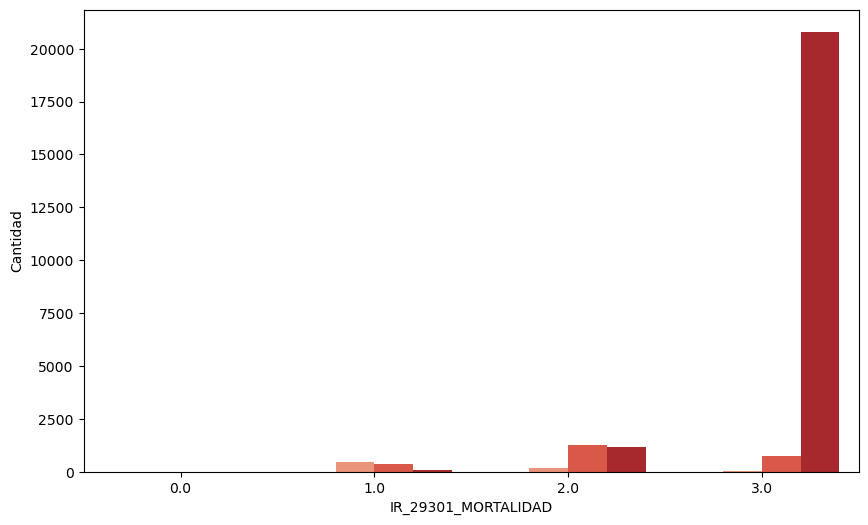

In [25]:
# Filtrar solo los casos fallecidos
fallecidos = df[df['FALLECIDO'] == 1]

# Contar fallecidos por combinación de Mortalidad y Severidad
conteo = fallecidos.groupby(["IR_29301_MORTALIDAD", "IR_29301_SEVERIDAD"]).size().reset_index(name='Cantidad')

# Graficar con seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=conteo, x="IR_29301_MORTALIDAD", y='Cantidad', hue="IR_29301_SEVERIDAD", palette='Reds')

plt.title('Fallecidos según Mortalidad y Severidad')
plt.xlabel('Mortalidad')
plt.ylabel('Número de Fallecidos')
plt.legend(title='Severidad')
plt.tight_layout()
plt.show()


In [28]:
fallecidos.shape

(25122, 3)

In [23]:

print("Matriz de correlación (Spearman):")
print(correlation_matrix)

Matriz de correlación (Spearman):
                     IR_29301_SEVERIDAD  FALLECIDO  IR_29301_MORTALIDAD
IR_29301_SEVERIDAD             1.000000   0.208357             0.876098
FALLECIDO                      0.208357   1.000000             0.224917
IR_29301_MORTALIDAD            0.876098   0.224917             1.000000


In [ ]:
# Convierte la columna 'IR_29301_SEVERIDAD' a enteros (tipo int) y extrae los valores en un arreglo numpy.
# Esto crea un array de severidad para su uso posterior en el cálculo de correlaciones.
severidad = grd_f["IR_29301_SEVERIDAD"].astype(int).values

# Convierte la columna 'FALLECIDO' a enteros (tipo int) y extrae los valores en un arreglo numpy.
# Este array contiene los valores 1 (fallecido) o 0 (no fallecido) para cada registro.
fallecidos = grd_f["FALLECIDO"].astype(int).values

# Convierte la columna 'IR_29301_MORTALIDAD' a enteros (tipo int) y extrae los valores en un arreglo numpy.
# Este array contiene los valores de mortalidad (1 o 0) para cada registro.
mortalidad = grd_f["IR_29301_MORTALIDAD"].astype(int).values




# Calcula la correlación de Pearson entre los arrays severidad y mortalidad utilizando np.corrcoef(),
# que devuelve una matriz de correlación. El valor [0, 1] extrae la correlación entre las dos variables.
correlacion = np.corrcoef(severidad, mortalidad)[0, 1]

# Imprime la correlación entre severidad y mortalidad, formateada a dos decimales.
print(f'Correlación entre mortalidad y severidad: {correlacion:.2f}')

# Calcula la correlación de Pearson entre los arrays severidad y fallecidos.
# La matriz de correlación resultante tiene el valor entre severidad y fallecidos en la posición [0, 1].
correlacion = np.corrcoef(severidad, fallecidos)[0, 1]

# Imprime la correlación entre fallecimiento y severidad, formateada a dos decimales.
print(f'Correlación entre fallecimiento y severidad: {correlacion:.2f}')

# Calcula la correlación de Pearson entre los arrays mortalidad y fallecidos.
# La matriz de correlación resultante tiene el valor entre mortalidad y fallecidos en la posición [0, 1].
correlacion = np.corrcoef(mortalidad, fallecidos)[0, 1]

# Imprime la correlación entre mortalidad y fallecimiento, formateada a dos decimales.
print(f'Correlación entre fallecimiento y mortalidad: {correlacion:.2f}')



Correlación entre mortalidad y severidad: 0.87
Correlación entre fallecimiento y severidad: 0.22
Correlación entre fallecimiento y mortalidad: 0.25


Sospechoso. Indagamos más.

In [16]:
# Crea un nuevo DataFrame mortal que contiene solo las columnas 'IR_29301_MORTALIDAD' y 'FALLECIDO' del DataFrame grd_f.
# Esto filtra las columnas que estamos interesados en analizar.
mortal = grd_f[["IR_29301_MORTALIDAD", "FALLECIDO"]]

# Agrupa los datos de mortal por la columna 'IR_29301_MORTALIDAD' y calcula el promedio de la columna 'FALLECIDO' para cada grupo.
# Como la columna 'FALLECIDO' tiene valores binarios (0 y 1), el promedio es igual al porcentaje de veces que un paciente fallece para cada valor de mortalidad.
# Si 'IR_29301_MORTALIDAD' es 1, el promedio mostrará la tasa de fallecimientos, y si es 0, mostrará la tasa de no fallecimientos.
mortal.groupby("IR_29301_MORTALIDAD").mean()


,FALLECIDO
IR_29301_MORTALIDAD,
0.0,0.000031
1.0,0.001709
2.0,0.015999
3.0,0.127126


In [17]:
# Crea un nuevo DataFrame sev que contiene solo las columnas 'IR_29301_SEVERIDAD' y 'FALLECIDO' del DataFrame grd_f.
# Esto filtra las columnas relacionadas con la severidad y el fallecimiento para analizarlas.
sev = grd_f[["IR_29301_SEVERIDAD", "FALLECIDO"]]

# Agrupa los datos de sev por la columna 'IR_29301_SEVERIDAD' y calcula el promedio de la columna 'FALLECIDO' para cada grupo.
# Como la columna 'FALLECIDO' es binaria (0 y 1), el promedio de 'FALLECIDO' para cada grupo de severidad muestra el porcentaje de fallecidos en cada nivel de severidad.
# Un valor de severidad específico tendrá el porcentaje de fallecidos que se corresponden con ese nivel.
sev.groupby("IR_29301_SEVERIDAD").mean()


,FALLECIDO
IR_29301_SEVERIDAD,
0.0,0.000031
1.0,0.001744
2.0,0.009412
3.0,0.107997


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

X = torch.tensor(grd_f.drop("FALLECIDO",axis = "columns" ))
y= torch.tensor(grd_f["FALLECIDO"])

model = nn.Sequential(

    nn.Linear(2, 10),

    nn.ReLU(),

    nn.Linear(10, 1),

    nn.Sigmoid()

)


# Define loss function and optimizer

criterion = nn.BCELoss()

optimizer = optim.Adam(model.parameters(), lr=0.01)  


# Train the model for 50 epochs

for epoch in range(50):  

    model.train()  # Set the model to training mode

    optimizer.zero_grad()  # Zero the gradients for iteration

    outputs = model(X)  # Compute predictions

    loss = criterion(outputs, y)  # Compute the loss

    loss.backward()  # Compute the gradient of the loss

    optimizer.step()  # Optimize the model parameters


ValueError: could not determine the shape of object type 'DataFrame'

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

# Simular un pequeño DataFrame como ejemplo (en la práctica usarías grd_f real)
data = {
    "SEXO": ["M", "F", "M", "F", "M"],
    "EDAD": [70, 25, 80, 55, 60],
    "DIAS_ESTANCIA": [10, 3, 20, 15, 7],
    "IR_29301_PESO": [1.5, 2.0, 3.2, 1.8, 2.5],
    "IR_29301_SEVERIDAD": [1, 2, 3, 2, 1],
    "IR_29301_MORTALIDAD": [1, 1, 4, 3, 2],
    "TIPO_ALTA": ["Vivo", "Vivo", "Fallecido", "Fallecido", "Vivo"]
}
df = pd.DataFrame(data)

# Crear columna FALLECIDO
df["FALLECIDO"] = (df["TIPO_ALTA"] == "Fallecido").astype(int)

# Preprocesamiento
features = ["SEXO", "EDAD", "DIAS_ESTANCIA", "IR_29301_PESO", "IR_29301_SEVERIDAD", "IR_29301_MORTALIDAD"]
X = df[features].copy()
y = df["FALLECIDO"].values

# Codificar sexo
le = LabelEncoder()
X["SEXO"] = le.fit_transform(X["SEXO"])

# Escalar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a tensores
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

# Separar entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2, random_state=42)

# Modelo simple
class DeathPredictor(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(6, 10),
            nn.ReLU(),
            nn.Linear(10, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

model = DeathPredictor()
loss_fn = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Entrenamiento
for epoch in range(100):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

final_loss = loss.item()
final_loss

0.002551733748987317